In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
# Load the cleaned dataset
file_path_cleaned = 'data/amazon_data_cleaned.csv'
amazon_cleaned = pd.read_csv(file_path_cleaned)

# Let's explore the dataset for potential insights:
# 1. Distribution of star ratings across products.
# 2. Relationship between number of ratings and star ratings.
# 3. Popularity of different brands based on number of ratings.
# 4. Trends in product pricing.
# 5. Connectivity technology preferences (e.g., WiFi, USB, Ethernet).

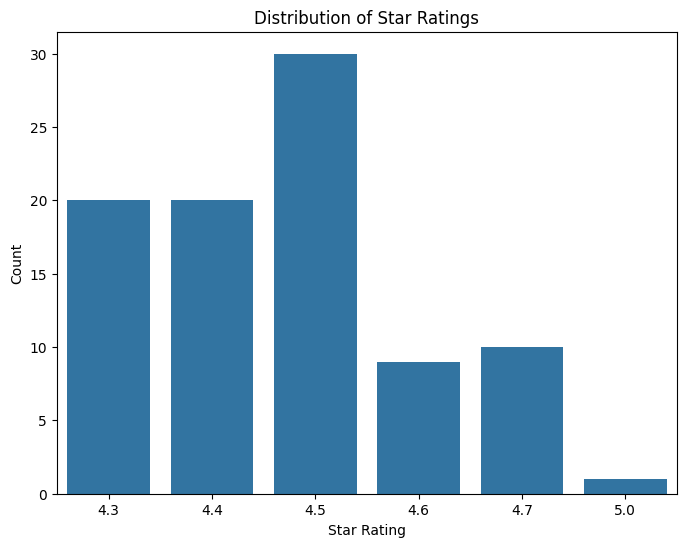

In [5]:
# Insight 1: Distribution of Star Ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='star rating', data=amazon_cleaned)
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.show()

**Distribution of Star Ratings**: The majority of products have high star ratings (4 or above), indicating a tendency for highly rated products to be best-sellers on Amazon.

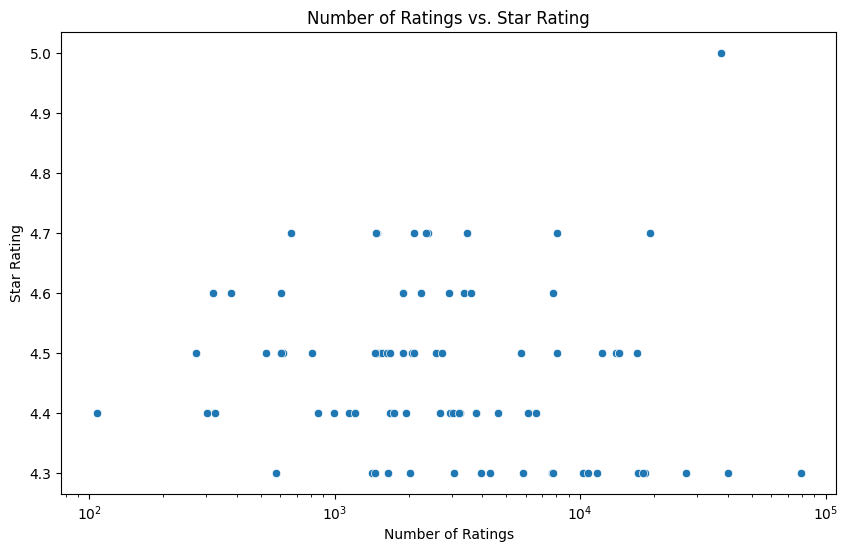

In [6]:
# Insight 2: Relationship between Number of Ratings and Star Ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=amazon_cleaned, x='number of ratings', y='star rating')
plt.title('Number of Ratings vs. Star Rating')
plt.xlabel('Number of Ratings')
plt.ylabel('Star Rating')
plt.xscale('log')  # Using a log scale due to wide range of 'number of ratings'
plt.show()

**Number of Ratings vs. Star Rating**: There's a wide range in the number of ratings across products. However, there isn't a clear trend between the number of ratings and the star rating, suggesting other factors might influence a product's popularity.

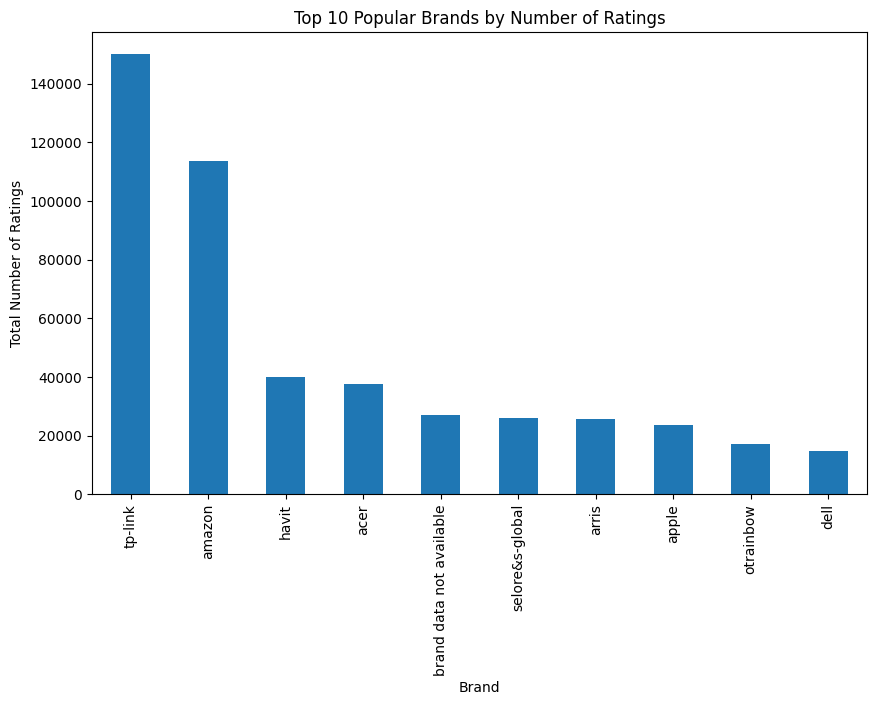

In [7]:
# Insight 3: Popularity of Different Brands (Top 10)
top_brands = amazon_cleaned.groupby('brand')['number of ratings'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_brands.plot(kind='bar')
plt.title('Top 10 Popular Brands by Number of Ratings')
plt.xlabel('Brand')
plt.ylabel('Total Number of Ratings')
plt.show()

**Popularity of Different Brands**: Certain brands dominate in terms of the number of ratings they receive, which can be an indicator of brand popularity or customer trust.

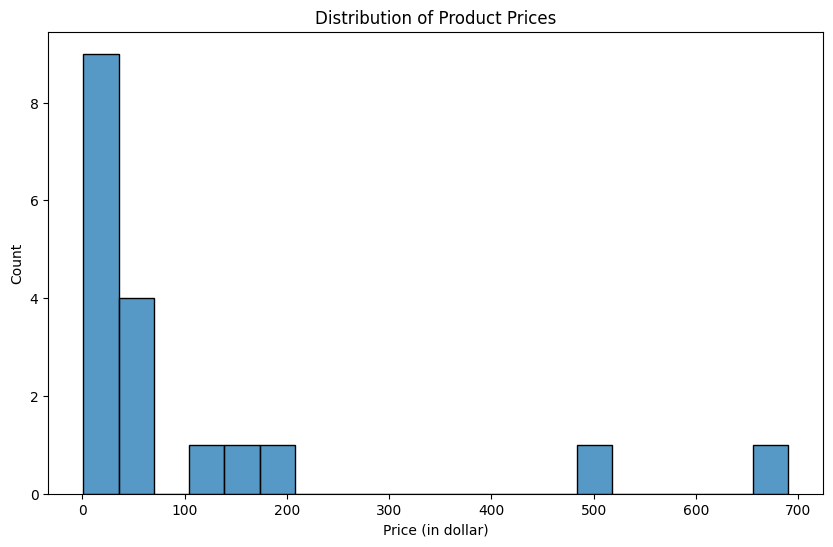

In [8]:
# Insight 4: Trends in Product Pricing
plt.figure(figsize=(10, 6))
sns.histplot(amazon_cleaned['price(in dollar)'], bins=20)
plt.title('Distribution of Product Prices')
plt.xlabel('Price (in dollar)')
plt.ylabel('Count')
plt.show()

**Distribution of Product Prices**: The price distribution shows a concentration in lower price ranges, which might suggest that more affordable products are frequent best-sellers.

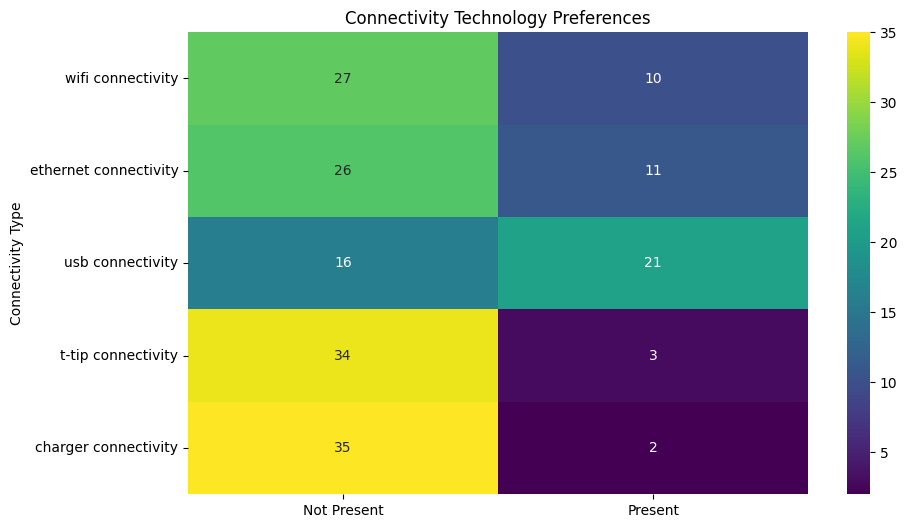

In [16]:
# Attempting Insight 5 again: Connectivity Technology Preferences
connectivity_columns = ['wifi connectivity', 'ethernet connectivity', 'usb connectivity', 't-tip connectivity', 'charger connectivity']
connectivity_counts = amazon_cleaned[connectivity_columns].apply(pd.Series.value_counts).T
connectivity_counts.drop(0, axis=1, inplace=True)  # Dropping '0' values as they represent 'data not available'
plt.figure(figsize=(10, 6))
sns.heatmap(connectivity_counts, annot=True, cmap='viridis')
plt.title('Connectivity Technology Preferences')
plt.ylabel('Connectivity Type')
plt.xticks(ticks=[0.5, 1.5], labels=['Not Present', 'Present'])
plt.show()

Connectivity Technology Preferences: The heatmap indicates the presence or absence of different connectivity technologies across the products. Key observations include:

* WiFi Connectivity: A significant number of products feature WiFi connectivity.
* USB Connectivity: USB connectivity is also commonly present, indicating its importance in product specifications.
* Ethernet and Charger Connectivity: These are less common compared to WiFi and USB, but still notable.
* T-Tip Connectivity: This is the least common among the analyzed connectivity types.

In [18]:
# Insight 1: Brand Diversity in Top-Ranked Products
# We'll consider the top 50 ranked products
top_50_products = amazon_cleaned.head(50)
brand_diversity_top_50 = top_50_products['brand'].value_counts()
brand_diversity_top_50

brand
amazon                      14
tp-link                      4
apple                        3
dell                         2
superer                      2
siliconv                     2
arris                        2
yomela                       1
ixcv                         1
baseus                       1
sle-tech                     1
dzytnsy                      1
nspencm                      1
vienon                       1
brand data not available     1
havit                        1
furgor                       1
sightpro                     1
sunveza                      1
ostrich                      1
decszdy                      1
nelebuto                     1
acer                         1
marsdock                     1
selore&s-global              1
ifeart                       1
hibbo                        1
generic                      1
Name: count, dtype: int64

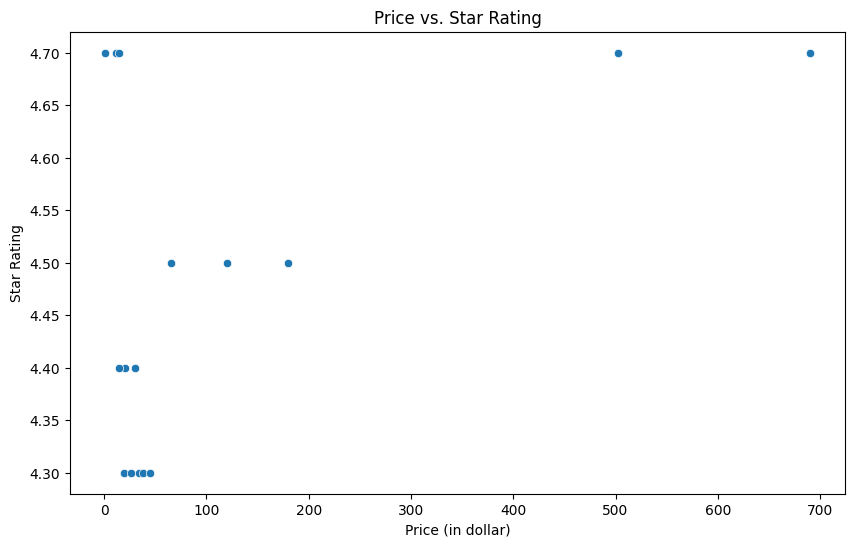

In [19]:
# Insight 2: Price vs. Star Rating Correlation
# We'll use a scatter plot to visualize this relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=amazon_cleaned, x='price(in dollar)', y='star rating')
plt.title('Price vs. Star Rating')
plt.xlabel('Price (in dollar)')
plt.ylabel('Star Rating')
plt.show()

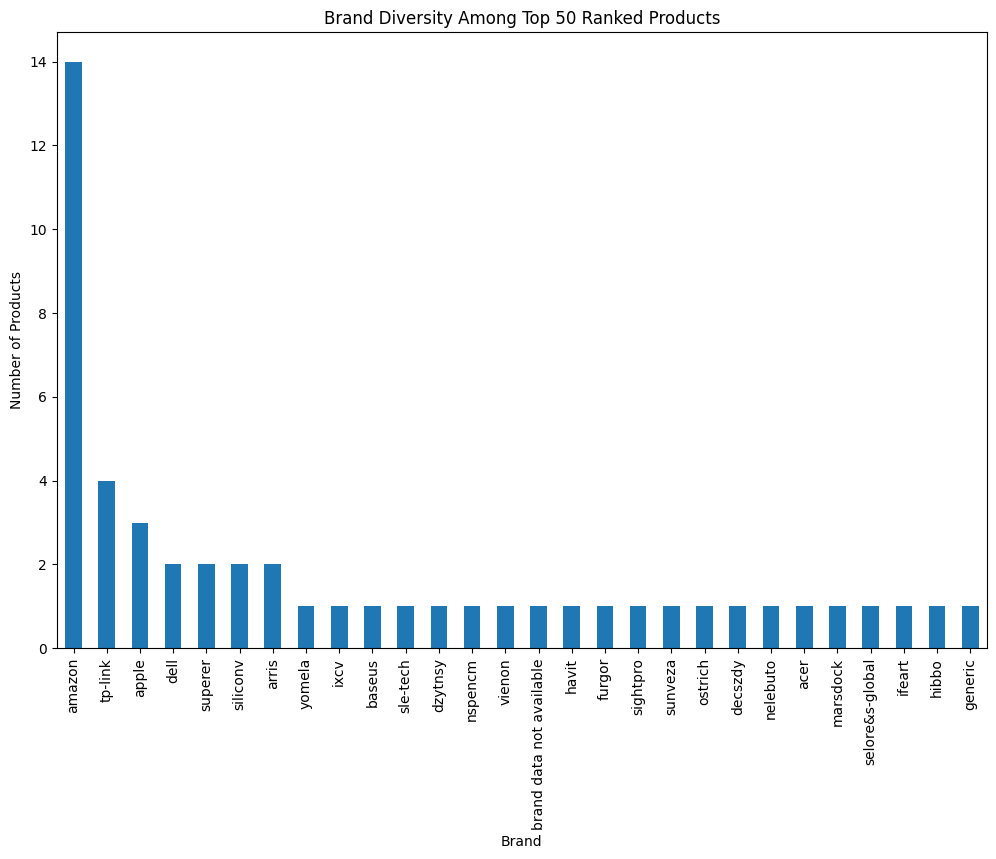

In [20]:
# Visualizing Brand Diversity in Top-Ranked Products
plt.figure(figsize=(12, 8))
brand_diversity_top_50.plot(kind='bar')
plt.title('Brand Diversity Among Top 50 Ranked Products')
plt.xlabel('Brand')
plt.ylabel('Number of Products')
plt.show()

# Visualizing Product Popularity, Average Ratings, and Price Distributions

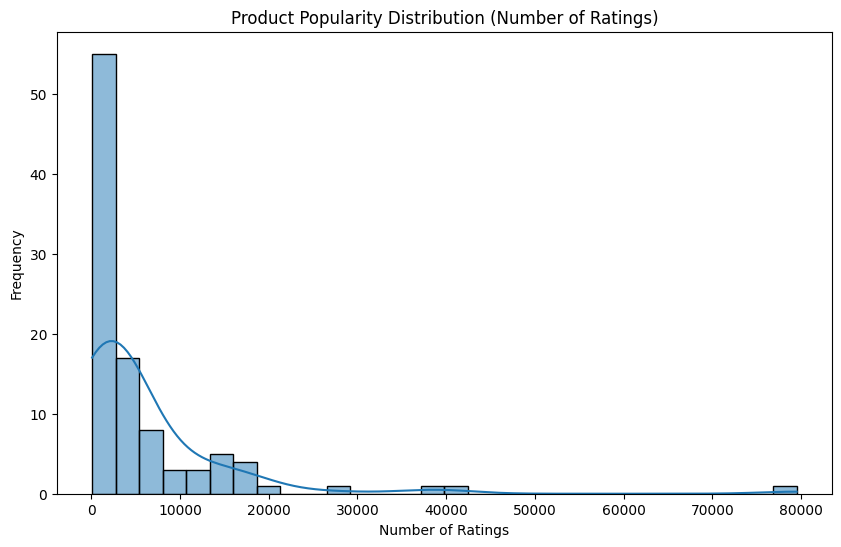

In [24]:
# Product Popularity (measured by the number of ratings)
plt.figure(figsize=(10, 6))
sns.histplot(amazon_cleaned['number of ratings'], bins=30, kde=True)
plt.title('Product Popularity Distribution (Number of Ratings)')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

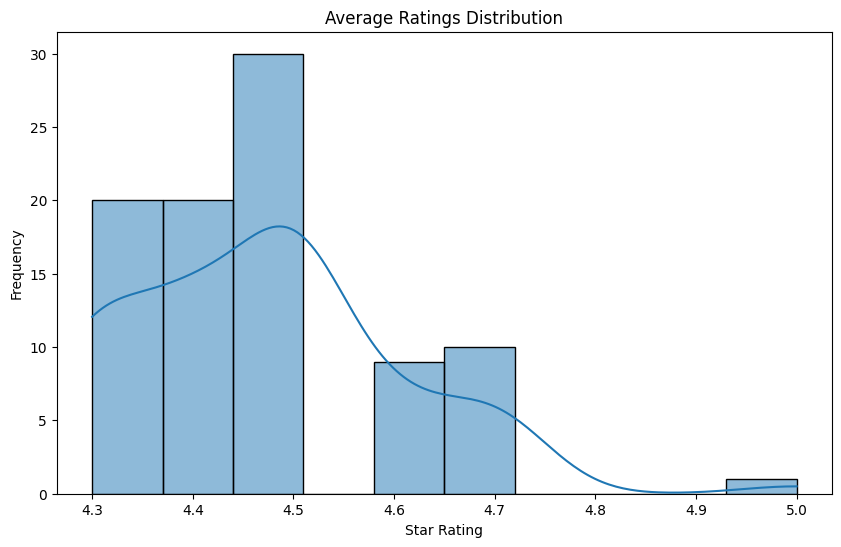

In [25]:
# Average Ratings Distribution
plt.figure(figsize=(10, 6))
sns.histplot(amazon_cleaned['star rating'], bins=10, kde=True)
plt.title('Average Ratings Distribution')
plt.xlabel('Star Rating')
plt.ylabel('Frequency')
plt.show()

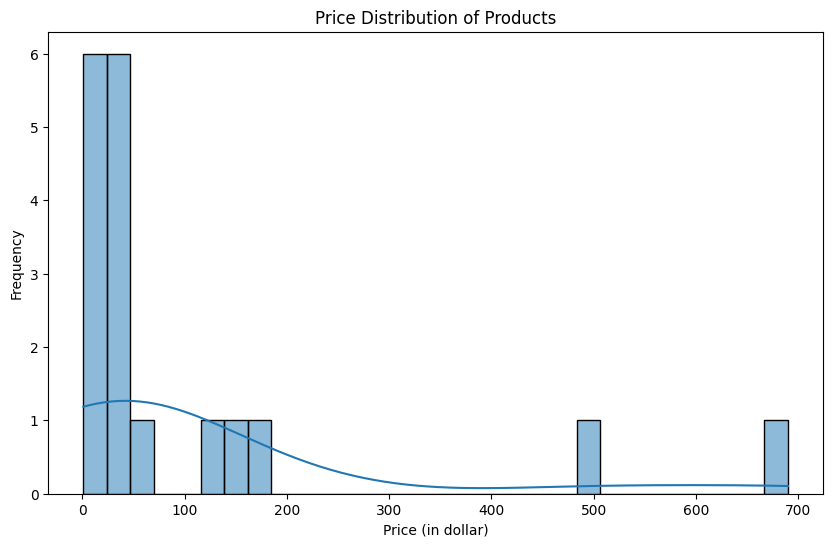

In [26]:
# Price Distributions
plt.figure(figsize=(10, 6))
sns.histplot(amazon_cleaned['price(in dollar)'].dropna(), bins=30, kde=True)  # Excluding NaN values for price
plt.title('Price Distribution of Products')
plt.xlabel('Price (in dollar)')
plt.ylabel('Frequency')
plt.show()